In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline 

In [2]:
df = pd.read_csv('mpg_ggplot2.csv')
df_select = df.loc[df.cyl.isin([4,8]),:]
df_select

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
224,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize


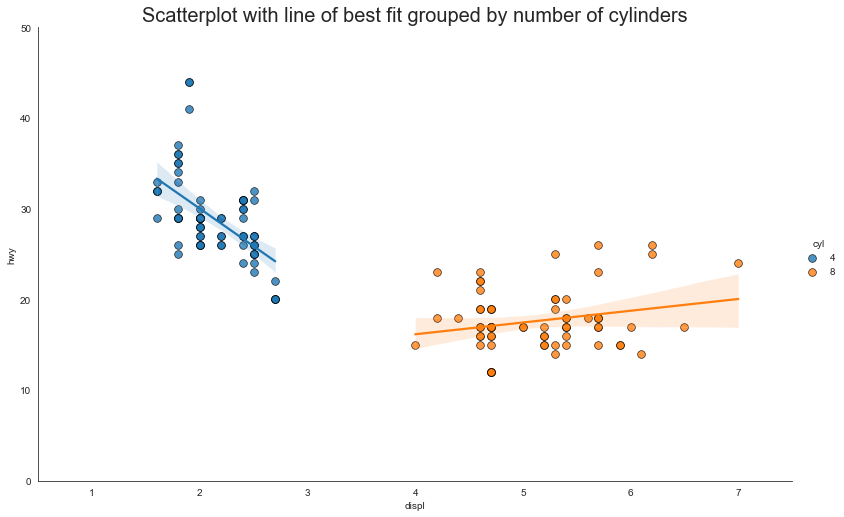

In [3]:
# Scatter plot with linear regression line of best fit with grouping
sns.set_style('white')

gridobj = sns.lmplot(x='displ', y='hwy', data=df_select, hue='cyl', height=7, palette='tab10',
                         aspect=1.6, scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
#Decoration
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

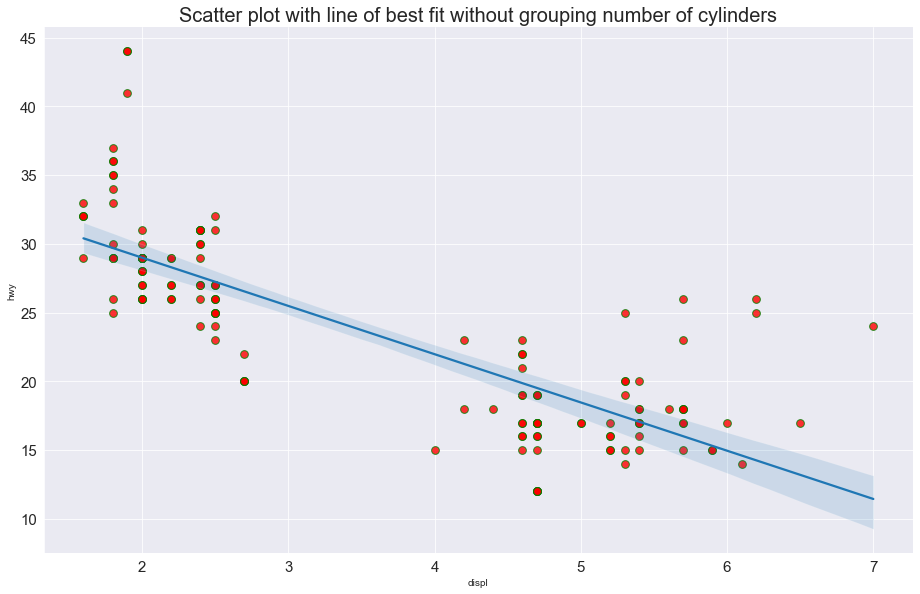

In [4]:
#Scatter plot with linear regression line of best fit without grouping
sns.set_style('darkgrid')

gridobject = sns.lmplot(x='displ',y='hwy', data=df_select, height=8, palette='tab10', aspect=1.6, 
                        scatter_kws=dict(facecolors='r', edgecolors='g', linewidths=1, s=60))

gridobj.set(xlim=(0.5,7.5), ylim=(0,50))
plt.title("Scatter plot with line of best fit without grouping number of cylinders", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

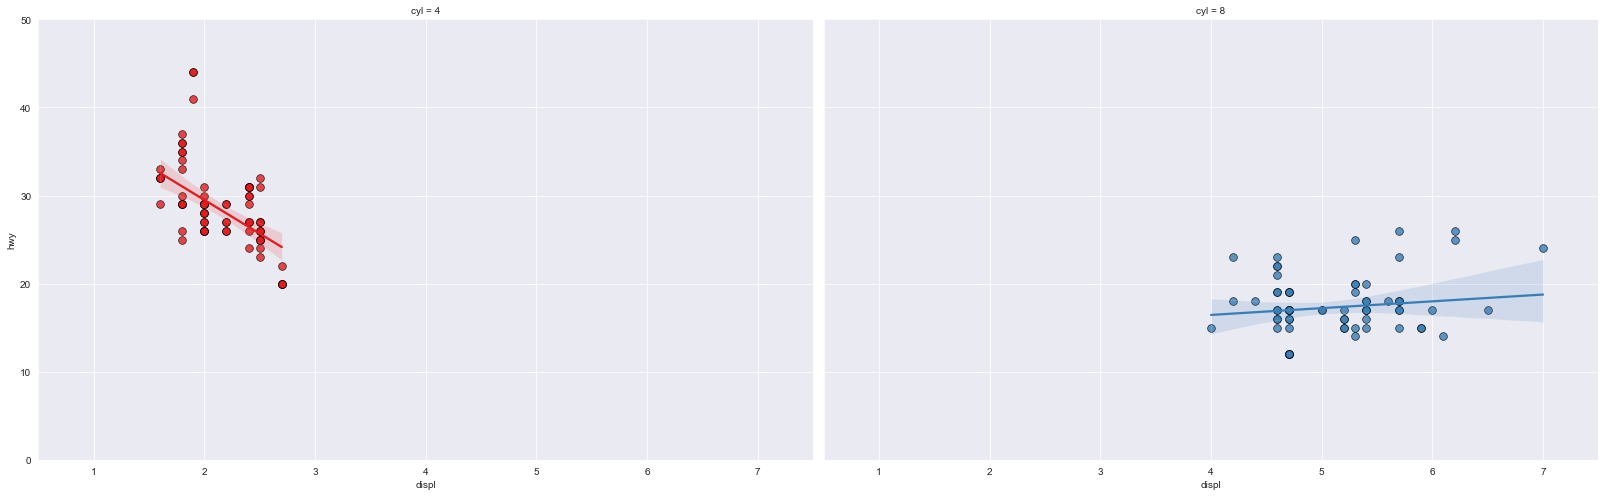

In [5]:
# Scatter plot with linear regression line of best fit with grouping number of cylinder where each group should be in its own column
sns.set_style('darkgrid')
# gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
#                      height=7, aspect=1.6, robust=True, palette='tab10', 
#                      scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
gridobj = sns.lmplot(x='displ',y='hwy', 
                     data=df_select, 
                     hue='cyl', 
                     height=7,
                     palette='Set1', 
                     aspect=1.6, 
                     col='cyl',
                     robust=True,
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

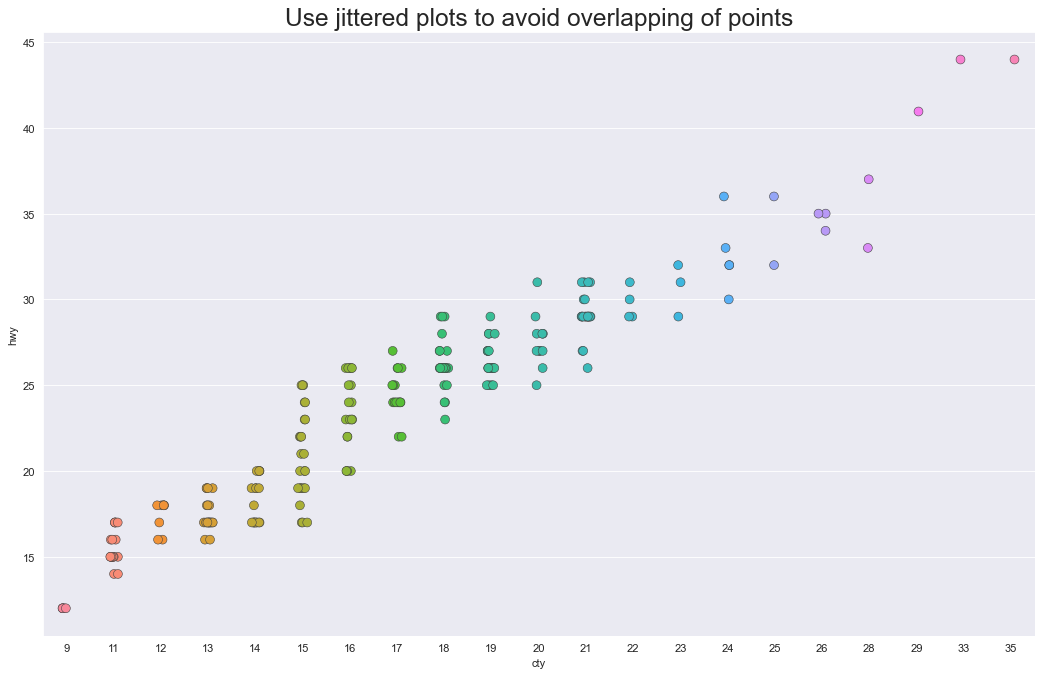

In [6]:
#Jittering with stripplot 
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,10), dpi=80)
sns.stripplot(x=df.cty, y=df.hwy, size=8, linewidth=.5, ax=ax)
plt.title("Use jittered plots to avoid overlapping of points", fontsize=22)
plt.show()

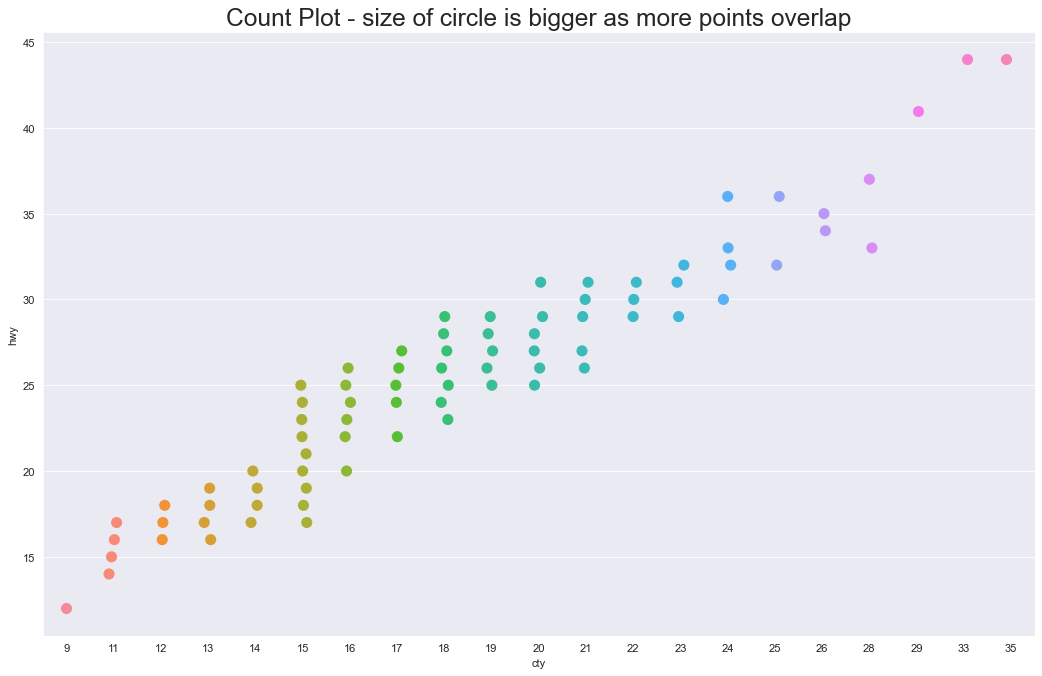

In [14]:
#Counts Plot 

df_counts = df.groupby(['hwy','cty']).size().reset_index(name='counts')

# Draw Stripplot
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
# sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

fig,ax = plt.subplots(figsize=(16,10), dpi=80)
sns.stripplot(df_counts.cty, df_counts.hwy, size=10, ax=ax)

plt.title('Count Plot - size of circle is bigger as more points overlap', fontsize=22)
plt.show()


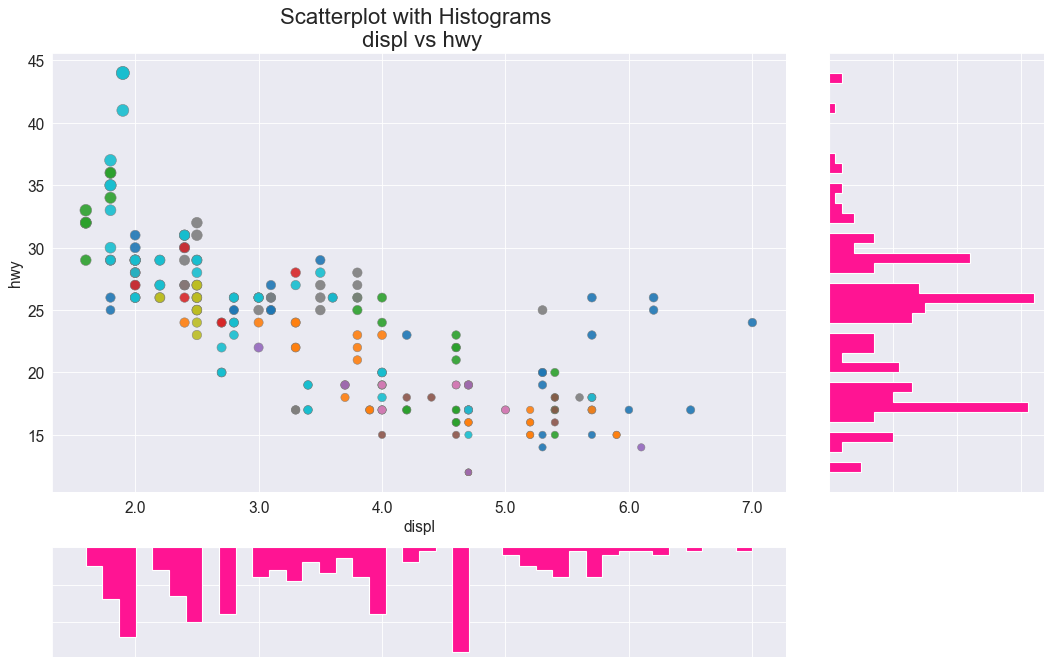

In [42]:
#Marginal Histogram 
fig= plt.figure(figsize=(16,10), dpi=80)
grid = plt.GridSpec(4,4,hspace=0.5, wspace=0.2)

ax_main = fig.add_subplot(grid[:-1,:-1])
ax_right = fig.add_subplot(grid[:-1,-1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1,0:-1], xticklabels=[],yticklabels=[])


# Scatterplot on main ax
ax_main.scatter('displ','hwy', 
                alpha=0.9,
                data=df,
                cmap='tab10',
                edgecolors='grey',
                linewidths=0.5,
                s=df.cty*4,
               c=df.manufacturer.astype('category').cat.codes)

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# histogram on the bottom
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)

for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels()+ ax_main.get_yticklabels()):
    item.set_fontsize(14)
    
xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

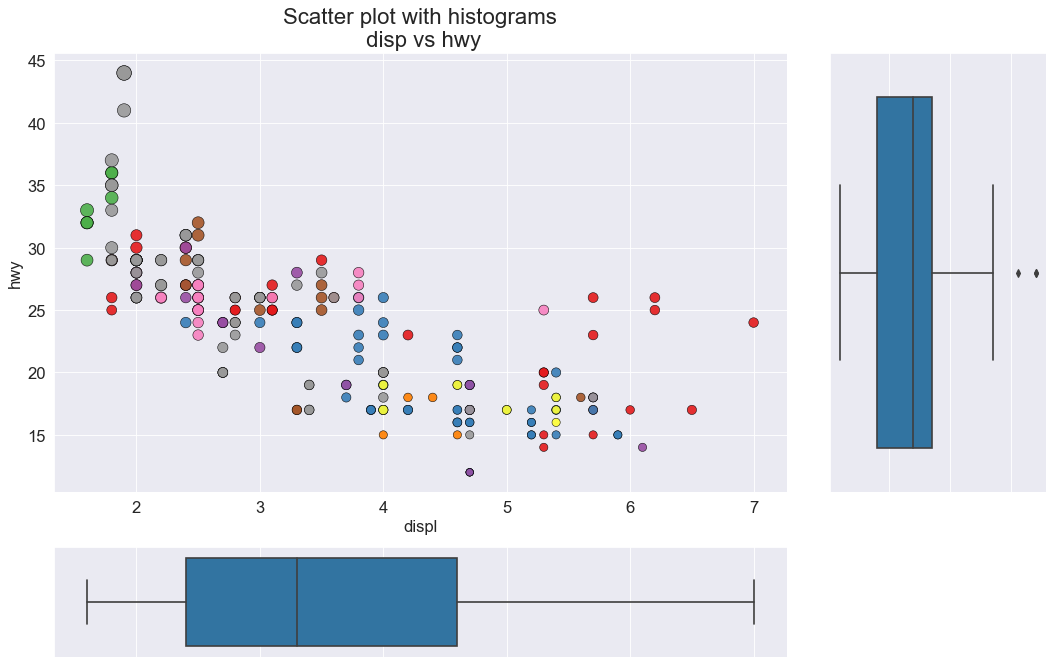

In [64]:
# marginal boxplot

# Create Fig and gridspec
fig = plt.figure(figsize=(16,10), dpi=80)
grid = plt.GridSpec(4,4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1,:-1])
ax_right = fig.add_subplot(grid[:-1,-1], xticklabels=[],yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1,0:-1], xticklabels=[],yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', 
                s=df.cty*5,
                c = df.manufacturer.astype('category').cat.codes, 
                linewidth=.5, 
                data=df,
                cmap='Set1',
                edgecolor='k', 
                alpha=0.9)

# Add a graph in each boxplot
sns.boxplot(df.hwy, ax=ax_right, orient='v')
sns.boxplot(df.displ, ax=ax_bottom, orient='w')

# Remove x axis name for the boxplot
ax_right.set(xlabel='')
ax_bottom.set(xlabel='')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in [ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels():
    item.set_fontsize(15)
    
# Main Title, Xlabel and YLabel
ax_main.set(title="Scatter plot with histograms\n disp vs hwy", xlabel='displ', ylabel='hwy')


plt.show()